# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 23     |  |
| :-------------|:-------------|
| Student Meine de Boer| 6475728 |
| Student Annelinde Tijdhof| 6327508 |
| Student Isa Prins| 6578977 |

| Planning Groep: XX     |Tijdstip / Tijdspanne  |
|---|---|
| Sanity check | 11:00-11:15 |
| Ideeen voor de sensoren|11:15-11:35|
| Mijlpaal 1: Criteria opgesteld | 11:35-12:00 |
| Opstellingen maken |13:30-14:30 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 14:30-15:30 |
| Afmaken |16:30-17:30|
| Pauze 1| 12:30-13:30 |
| Pauze 2| 15:30-15:45 |

## *Opdracht 1*: Foto van alle schetsen.



![Alt](ideeenDef.jpeg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|LDR | Meten wanneer de DEF doos wordt geopend | sensor moet tussen de 0 en 2000 lux kunnen meten, stappen van 400 lux kunnen meten, mag een maximale onzekerheid van 50 lux hebben, moet instantane metingen kunnen maken |
|Druk | Fiets lamp aandoen wanneer je gaat fietsen | De sensor moet kunnen meten tussen 0-125 newton met een maximale onzekerheid van 60 newton, moet instantaan kunnen meten |
|Temperatuur | meten of de Ijskast deur te lang open staat  | van 0-10 graden kunnen meten, elke graad nauwkeurig, alleen de lucht temperatuur opmeten, maximale onzekerheid van een halve graad,  |
|sensornaam | toepassing omschrijving | Criteria omschrijving |
|sensornaam | toepassing omschrijving | Criteria omschrijving |
|sensornaam | toepassing omschrijving | Criteria omschrijving |
|sensornaam | toepassing omschrijving | Criteria omschrijving |
|sensornaam | toepassing omschrijving | Criteria omschrijving |
|sensornaam | toepassing omschrijving | Criteria omschrijving |

Groep 23 heeft gekozen voor sensor LDR. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.

 ![Alt](IMG_0696.jpeg "meetopstelling student")

 ![Alt](IMG_0697.jpeg "meetopstelling student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? \
    -Lichtsterkte in Lux
2. Over welk bereik ga je deze variabelen veranderen?\
    -0 tot 2000 lux
3. Wat ga je allemaal meten?\
    -De lichtsterkte via phyphox en de lichtsterkte via de lichtsensor
4. Hoeveel metingen ga je doen?\
    -5
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?\
    -ja


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
Je zier hier ons circuit waarmee we via de sensor de lichtsterkte meten, die waardes zijn zichtbaar op het laptop scherm. Ook zie je een telefoon met phyphox erbij, deze wordt gebruikt om de werkelijke lichtsterkte te meten.

 ![Alt](IMG_0695.jpeg "meetopstelling student")



## *Opdracht 6*: Meten en fitten, Leerdoel

In [2]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sensor = np.array([260,370,540,676,768])
phyphox = np.array([600,1050,3050,11000,33000])
yerror = np.array([5,5,5,5,5])
correctYError = yerror/(sensor*np.log(10))
xerror = np.array([1,50,100,350,1000])
correctXError = xerror/(phyphox*np.log(10))
def fitFunc(x,a,b):
    return a*x +b 

values, cov = curve_fit(fitFunc,np.log(phyphox),np.log(sensor))
fitSen = fitFunc(np.log(phyphox),values[0],values[1])



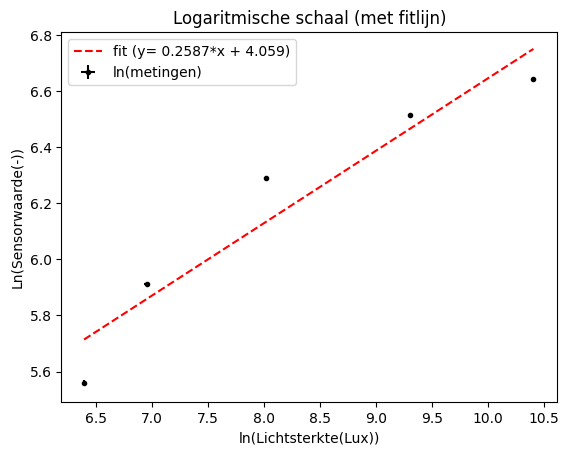

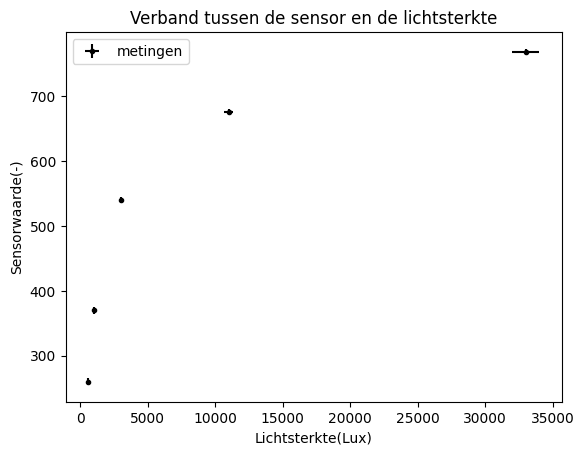

De evenredigheidscoefficient tussen de sensor en de lichtsterkte is: 0.25868926648731116 op log schaal


In [21]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline
plt.figure
plt.title('Logaritmische schaal (met fitlijn)')
plt.xlabel('ln(Lichtsterkte(Lux))')
plt.ylabel('Ln(Sensorwaarde(-))')
#plt.scatter(np.log(phyphox),np.log(sensor))
plt.plot(np.log(phyphox),fitSen,'r--',label = 'fit (y= 0.2587*x + 4.059)')
plt.errorbar(np.log(phyphox),np.log(sensor),xerr = correctXError,yerr= correctYError,fmt = 'k.' ,label = 'ln(metingen)')
plt.legend()
plt.figure()
plt.title('Verband tussen de sensor en de lichtsterkte')
plt.xlabel('Lichtsterkte(Lux)')
plt.ylabel('Sensorwaarde(-)')
plt.errorbar(phyphox,sensor,xerr=xerror,yerr=yerror,fmt='k.',label ='metingen')
plt.legend()
plt.show()
print('De evenredigheidscoefficient tussen de sensor en de lichtsterkte is: ' + str(values[0]) + ' op log schaal')



## *Opdracht 7*: Iteratie nodig?

Na onze proeven zijn we er achter gekomen dat de sensor niet tot maar 2000 lumen moet kunnen meter. Het daglicht geeft namelijk een waarde van tot wel 35000 lumen. Dit verandert onze maximale onzekerheid naar 1000 lumen. We doen nu dus 6 metingen tussen de 0 en 35000 lumen, i.p.v. tot 2000 lumen. Verder  verandert dit niks voor ons experiment.

## *Opdracht 8*: Conclusie, leerdoel

Onze opstelling werkt voor ons doel. De sensor kan goed het verschil meten tussen open doos en dichte doos, oftwel tussen 0 lumen en alles hoger dan dat (tot 33.000 lumen). Ook kan het goed elke variatie van daglicht meten. 

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Licht kort toe wat er in de foto te zien is.
Je zier hier ons circuit waarmee we via de sensor de lichtsterkte meten, die waardes zijn zichtbaar op het laptop scherm. Ook zie je een telefoon met phyphox erbij, deze wordt gebruikt om de werkelijke lichtsterkte te meten.

![Alt](IMG_0695.jpeg "meetopstelling student")
![Alt](IMG_0696.jpeg "meetopstelling student")

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|LDR | Meten wanneer de DEF doos wordt geopend | sensor moet tussen de 0 en 2000 lux kunnen meten, stappen van 400 lux kunnen meten, mag een maximale onzekerheid van 50 lux hebben, moet instantane metingen kunnen maken |
|Druk | Fiets lamp aandoen wanneer je gaat fietsen | De sensor moet kunnen meten tussen 0-125 newton met een maximale onzekerheid van 60 newton, moet instantaan kunnen meten |
|Temperatuur | meten of de Ijskast deur te lang open staat  | van 0-10 graden kunnen meten, elke graad nauwkeurig, alleen de lucht temperatuur opmeten, maximale onzekerheid van een halve graad,  |

Groep 23 heeft gekozen voor sensor LDR. 



### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 3 beheersen.

## Conclusie

Onze opstelling werkt voor ons doel. De sensor kan goed het verschil meten tussen open doos en dichte doos, oftwel tussen 0 lumen en alles hoger dan dat (tot 33.000 lumen). Ook kan het goed elke variatie van daglicht meten. 

In [8]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sensor = np.array([260,370,540,676,768])
phyphox = np.array([600,1050,3050,11000,33000])
yerror = np.array([5,5,5,5,5])
correctYError = yerror/(sensor*np.log(10))
xerror = np.array([1,50,100,350,1000])
correctXError = xerror/(phyphox*np.log(10))
def fitFunc(x,a,b):
    return a*x +b 

values, cov = curve_fit(fitFunc,np.log(phyphox),np.log(sensor))
fitSen = fitFunc(np.log(phyphox),values[0],values[1])



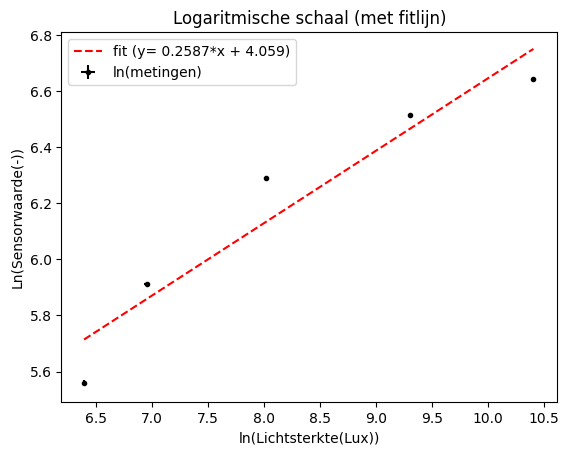

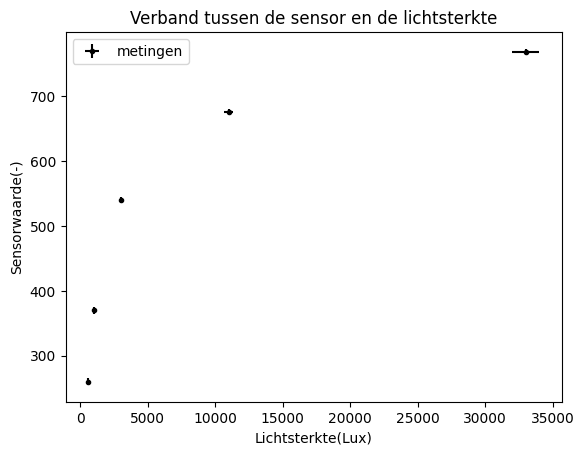

De evenredigheidscoefficient tussen de sensor en de lichtsterkte is: 0.25868926648731116 op log schaal


In [20]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline
plt.figure
plt.title('Logaritmische schaal (met fitlijn)')
plt.xlabel('ln(Lichtsterkte(Lux))')
plt.ylabel('Ln(Sensorwaarde(-))')
#plt.scatter(np.log(phyphox),np.log(sensor))
plt.plot(np.log(phyphox),fitSen,'r--',label = 'fit (y= 0.2587*x + 4.059)')
plt.errorbar(np.log(phyphox),np.log(sensor),xerr = correctXError,yerr= correctYError,fmt = 'k.' ,label = 'ln(metingen)')
plt.legend()
plt.figure()
plt.title('Verband tussen de sensor en de lichtsterkte')
plt.xlabel('Lichtsterkte(Lux)')
plt.ylabel('Sensorwaarde(-)')
plt.errorbar(phyphox,sensor,xerr=xerror,yerr=yerror,fmt='k.',label ='metingen')
plt.legend()
plt.show()
print('De evenredigheidscoefficient tussen de sensor en de lichtsterkte is: ' + str(values[0]) + ' op log schaal')



Je zier hier ons circuit waarmee we via de sensor de lichtsterkte meten, die waardes zijn zichtbaar op het laptop scherm. Ook zie je een telefoon met phyphox erbij, deze wordt gebruikt om de werkelijke lichtsterkte te meten.

![Alt](IMG_0695.jpeg "meetopstelling student")

![Alt](IMG_0696.jpeg "meetopstelling student")